# <center> Модель предсказания отказов компрессора высокого давления

## Импорт библиотек

In [180]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%pylab inline

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [212]:
data = pd.read_excel(r'KVD.XLSX')
data.head()

,DateTime,B3_P_C5,B3_P_C6,B3_P_inKVD1,B3_P_inKVD2,B3_PDIT561,B3_PDIT571,B3_PIT561,B3_PIT563,B3_PIT571,...,B3_Tg_outKVD2,B3_TIT561,B3_TIT571,B3_E_BCL,B3_E_Cm,B3_E_MCL,B3_E_Ras1,B3_E_Ras2,B3_evNKVD,y
0,2019-05-17 09:20:00,5.168750,13.500001,5.082812,13.240625,26.105747,104.541084,5.106489,13.912589,13.340695,...,108.139999,35.343327,41.644539,0.673587,4.394132,1.696910,2.728573,1.678707,10080.102539,0
1,2019-05-17 09:30:00,5.159375,13.500001,5.082812,13.240625,26.266880,104.962227,5.090353,13.912589,13.340695,...,108.139999,35.041199,41.598763,0.673587,4.394336,1.697093,2.728573,1.678707,10080.102539,0
2,2019-05-17 09:40:00,5.148125,13.471874,5.082812,13.214062,26.058136,104.321358,5.074903,13.885215,13.314511,...,108.139999,34.940491,41.642250,0.673815,4.398725,1.699382,2.734113,1.678707,10080.102539,0
3,2019-05-17 09:50:00,5.136875,13.445312,5.056250,13.187499,25.900665,104.586861,5.074903,13.859031,13.288327,...,108.139999,34.940491,41.740669,0.675830,4.403408,1.699291,2.734113,1.678707,10080.102539,0
4,2019-05-17 10:00:00,5.148125,13.446875,5.056250,13.187499,26.208286,104.641792,5.074903,13.858436,13.288922,...,108.139999,35.041199,41.939804,0.673815,4.394619,1.697002,2.734113,1.678707,10080.102539,0


## Общее исследование данных

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13958 entries, 0 to 13957
Data columns (total 26 columns):
DateTime         13958 non-null datetime64[ns]
B3_P_C5          13955 non-null float64
B3_P_C6          13955 non-null float64
B3_P_inKVD1      13951 non-null float64
B3_P_inKVD2      13955 non-null float64
B3_PDIT561       13955 non-null float64
B3_PDIT571       13955 non-null float64
B3_PIT561        13955 non-null float64
B3_PIT563        13955 non-null float64
B3_PIT571        13955 non-null float64
B3_PIT573        13955 non-null float64
B3_T_C5          13955 non-null float64
B3_T_C6          13955 non-null float64
B3_Tg_inKVD1     13955 non-null float64
B3_Tg_inKVD2     13955 non-null float64
B3_Tg_outKVD1    13955 non-null float64
B3_Tg_outKVD2    13955 non-null float64
B3_TIT561        13955 non-null float64
B3_TIT571        13955 non-null float64
B3_E_BCL         13955 non-null float64
B3_E_Cm          13955 non-null float64
B3_E_MCL         13955 non-null float64
B3_E

In [4]:
data.describe()

,B3_P_C5,B3_P_C6,B3_P_inKVD1,B3_P_inKVD2,B3_PDIT561,B3_PDIT571,B3_PIT561,B3_PIT563,B3_PIT571,B3_PIT573,...,B3_Tg_outKVD2,B3_TIT561,B3_TIT571,B3_E_BCL,B3_E_Cm,B3_E_MCL,B3_E_Ras1,B3_E_Ras2,B3_evNKVD,y
count,13955.000000,13955.000000,13951.000000,13955.000000,13955.000000,13955.000000,13955.000000,13955.000000,13955.000000,13955.000000,...,13955.000000,13955.000000,13955.000000,13955.000000,13955.000000,13955.000000,13955.000000,13955.000000,13955.000000,13958.000000
mean,5.323898,14.039342,5.226354,13.815826,31.678404,104.633832,5.248177,14.423204,13.921211,25.204768,...,104.909567,31.575105,28.629974,0.802719,4.802717,1.715054,2.748148,1.808568,9929.570477,0.025075
std,0.064942,0.703086,0.061968,0.678627,3.192738,12.838785,0.064652,0.672769,0.683766,1.838717,...,5.442119,10.129655,7.191234,0.074379,0.343508,0.118338,0.120577,0.074821,163.214755,0.156359
min,5.053750,7.142188,4.946875,6.974999,19.880066,72.387276,4.967441,7.670566,7.052850,9.180190,...,72.489998,6.139849,10.294117,0.183864,1.786967,0.481804,1.493082,1.184330,8435.300781,0.000000
25%,5.273750,13.798438,5.181250,13.585938,29.255209,93.865875,5.197471,14.186931,13.670382,24.697871,...,102.410004,26.264591,23.080795,0.794392,4.713647,1.687480,2.719898,1.800132,9838.818359,0.000000
50%,5.338750,14.160937,5.240625,13.931251,31.445183,104.669258,5.265793,14.523758,14.031013,25.611525,...,104.839996,31.090637,27.018768,0.819890,4.918274,1.730144,2.763374,1.826215,9986.375000,0.000000
75%,5.362500,14.514062,5.267187,14.267187,33.609524,113.847565,5.290856,14.876655,14.381530,26.250000,...,108.480003,34.211491,33.429848,0.844060,4.992021,1.783703,2.817961,1.850003,10050.109375,0.000000
max,6.006250,15.390626,5.662500,15.048437,53.747768,180.503555,5.673666,15.155162,15.205745,27.092756,...,116.099998,118.540863,111.221100,0.943626,5.181017,1.864271,2.903966,1.953301,10104.472656,1.000000


In [5]:
data.shape

(13958, 26)

In [6]:
#Распределение значениц в столбце показателе отказов
data['y'].value_counts()

0    13608
1      350
Name: y, dtype: int64

In [7]:
#seaborn pair plot - посмотреть корреляцию параметров относительно отказов

## Feature engineering

### Заполнение пропусков в числовых данных

In [160]:
data.columns

Index(['DateTime', 'B3_P_C5', 'B3_P_C6', 'B3_P_inKVD1', 'B3_P_inKVD2',
       'B3_PDIT561', 'B3_PDIT571', 'B3_PIT561', 'B3_PIT563', 'B3_PIT571',
       'B3_PIT573', 'B3_T_C5', 'B3_T_C6', 'B3_Tg_inKVD1', 'B3_Tg_inKVD2',
       'B3_Tg_outKVD1', 'B3_Tg_outKVD2', 'B3_TIT561', 'B3_TIT571', 'B3_E_BCL',
       'B3_E_Cm', 'B3_E_MCL', 'B3_E_Ras1', 'B3_E_Ras2', 'B3_evNKVD', 'y'],
      dtype='object')

In [213]:
#Расчет медиан для каждого атрибута по группам в зависимости от целевого столбца

not_features = ['DateTime', 'y'] #Столбцы, не являющиеся атрибутами
#median_values = pd.DataFrame(columns = ['col', 'median_y0', 'median_y1'])

for col in data.loc[:, ~data.columns.isin(not_features)].columns:
    median_y0 = data[col].loc[~pd.isnull(data[col])].loc[data['y']==0].median()
    median_y1 = data[col].loc[~pd.isnull(data[col])].loc[data['y']==1].median()
    
    '''
    median_values = median_values.append(pd.DataFrame([[col, median_y0, median_y1]],
                                                        columns = ['col', 'median_y0', 'median_y1']),
                                                        ignore_index=True)
    '''
    
    #замена пустого значения на медиану
    #data[col].fillna(median_y0, inplace=True) #нельзя применить условие, не подходит
    data.loc[(pd.isnull(data[col])) & (data['y']==0), col] = median_y0
    data.loc[(pd.isnull(data[col])) & (data['y']==1), col] = median_y1

#median_values

### Разделение на обучающую и тестовую выборки

In [214]:
feature_list = data.loc[:, ~data.columns.isin(not_features)]
target = data['y']

X_train, X_test, Y_train, Y_test = train_test_split(feature_list, target, test_size=0.3, random_state=None)

In [215]:
columns = X_train.columns

### Заполнение пропусков в числовых данных

In [182]:
imputer = Imputer(missing_values='NaN', strategy='median', axis=0, verbose=0, copy=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [184]:
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [187]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=columns)

### Нормирование значений атрибутов

In [216]:
scaler = StandardScaler()

In [191]:
scaler.fit(X_train_imputed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [192]:
X_train_imputed_scaled = scaler.transform(X_train_imputed)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns=columns)

In [194]:
X_test_imputed_scaled = scaler.transform(imputer.transform(X_test))

In [198]:
X_train = X_train_imputed_scaled
X_test = X_test_imputed_scaled

In [ ]:
#проба без автозаполнения пропусков

In [217]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [218]:
X_train_imputed_scaled = scaler.transform(X_train)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns=columns)

In [219]:
X_test_imputed_scaled = scaler.transform(X_test)

In [220]:
X_train = X_train_imputed_scaled
X_test = X_test_imputed_scaled

## Обучение модели

In [221]:
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Предсказание

In [222]:
model.score(X_train, Y_train)

0.9757420675537359

In [223]:
model.score(X_test, Y_test)

0.9737344794651385

## Оценка качества модели

In [224]:
predictions = model.predict_proba(X_test)

In [225]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:, 1], Y_test):
    if predicted_prob > 0.5:
        predicted = 1
    else:
        predicted = 0
        
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
            
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [229]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)

In [237]:
print('True positive:', tp)
print('True negative:', tn)
print('False positive:', fp)
print('False negative:', fn)
print()
print('True positive rate: {:.2%}'.format(true_positive_rate))
print('False positive rate: {:.2%}'.format(false_positive_rate))
print()
print('Recall: {:.2%}'.format(recall))
print('Precision: {:.2%}'.format(precision))

True positive: 2
True negative: 4076
False positive: 4
False negative: 106

True positive rate: 1.85%
False positive rate: 0.10%

Recall: 1.85%
Precision: 33.33%


In [238]:
pr, re, thres = precision_recall_curve(Y_test, predictions[:, 1])

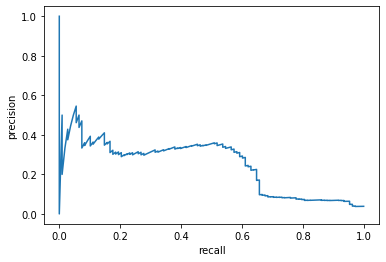

In [239]:
plt.xlabel('recall')
plt.ylabel('precision')

plt.plot(re, pr)

In [240]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

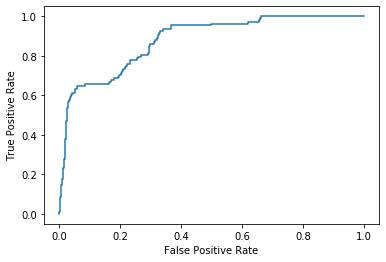

In [241]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot(fpr, tpr)

In [242]:
roc_auc_score(Y_test, predictions[:, 1])

0.8796046659404503

In [243]:
auc(fpr, tpr)

0.8796046659404503

In [115]:
# Function to generate Confusion matrix
def confusion_matrix(actfail, predictfail):
  # Compute Confusion matrix
  print("Actual, Predicted Observations:  ",len(actfail), len(predictfail))
  # print(actfail, predictfail)
  anpn = 0
  anpy = 0
  aypn = 0
  aypy = 0
  
  for i in range(len(actfail)):
      if (actfail[i]==0 and predictfail[i]==0):
          anpn = anpn + 1
      elif (actfail[i]==0 and predictfail[i]==1):
          anpy = anpy + 1
      elif (actfail[i]==1 and predictfail[i]==0):
          aypn = aypn + 1
      else:
          aypy = aypy + 1
  # Confusoin matrix
  print ("--------------------------------------------")
  print ("Confusion Matrix")
  print ("--------------------------------------------")
  print ("              ", "Predicted N", "Predicted Y")
  print ("Actual N      ", anpn,"          ", anpy) 
  print ("Actual Y      ", aypn,"          ", aypy)
  print ("--------------------------------------------")
  print ("Total observations  :  ", anpn+anpy+aypn+aypy)
  print ("False Positives     :  ", anpy)
  print ("False Negatives     :  ", aypn)
  print ("Overall Accuracy    :  ", round((float(anpn+aypy)/float(anpn+anpy+aypn+aypy))*100, 2), "%")
  print ("Sensitivity/Recall  :  ", round((float(aypy)/float(aypn+aypy))*100, 2), "%")
  print ("Specificity         :  ", round((float(anpn)/float(anpn+anpy))*100, 2), "%")
  print ("Precision           :  ", round((float(aypy)/float(anpy+aypy))*100, 2), "%")
  print ("--------------------------------------------")

In [118]:
# Function to return Predicted values
def score_data(trained_model, x_vals):
    ypredict = trained_model.predict(x_vals)
    return ypredict

In [119]:
actfail = Y_test.values
predictfail = score_data(model, X_test)

In [120]:
confusion_matrix(actfail, predictfail)

Actual, Predicted Observations:   4188 4188
--------------------------------------------
Confusion Matrix
--------------------------------------------
               Predicted N Predicted Y
Actual N       4072            3
Actual Y       110            3
--------------------------------------------
Total observations  :   4188
False Positives     :   3
False Negatives     :   110
Overall Accuracy    :   97.3 %
Sensitivity/Recall  :   2.65 %
Specificity         :   99.93 %
Precision           :   50.0 %
--------------------------------------------
